In [1]:
import numpy as np
import cv2
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
def img_to_numpy(path): 
    img = cv2.imread(filename=path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img


def tomar_muestra(label_names, muestra=4):
    N = label_names.name.nunique()
    M = muestra
    sample = (label_names.groupby('label')
                      .sample(n=M, replace=False)
                      .reset_index(drop=True)[['file', 'name']]
                      .set_index('file')
                      .to_records()
                      .reshape(N, M)
                      )
    return sample

def muestreo_categorias_inicial(label_names, images_folder=None, save_path=None):
    
    sample = tomar_muestra(label_names=label_names, muestra=1)

    fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20,8))
    for j in range(5):
            x = sample[j]
            path = x['file'][0]
            name = x['name'][0]
            # print(name, path)
            img = img_to_numpy(path)
            axs[j].imshow(img)
            axs[j].set_title(name)
            axs[j].axis('off')
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()
    plt.close(fig)
    return None


def get_labels_and_paths(input_folder):
   return sorted([(dp.split("/")[1],os.path.join(dp, f)) for dp, dn, filenames in os.walk('input') for f in filenames if os.path.splitext(f)[1] == '.jpg'])  

def shape_mal(img_path:str, img_shape=(250,250,3))->bool:
    return cv2.imread(filename=img_path).shape!=img_shape

def rango_mal(img_path:str)->bool:
    flattened = cv2.imread(filename=img_path).flatten()
    return np.sum((flattened>=0) & (flattened<=255)) != len(flattened)

def contains_nulls(img_path:str)->bool:
    img = cv2.imread(filename=img_path)
    return np.sum(np.isnan(img)) > 0

def chequeo_completo(img_path:str)->bool:
    return np.array([shape_mal(img_path), rango_mal(img_path), contains_nulls(img_path)])

def retorno_error(booleanos)->bool:
    return np.array(['shape mal','rango mal','contiene nulos'])[booleanos]

def verificar_imagenes(all_paths:list)->dict:
    errores = {}
    for img_path in tqdm(all_paths):
        booleanos = chequeo_completo(img_path)
        if any(booleanos): 
            errores[img_path.split("/")[-1]] = retorno_error(booleanos=booleanos)
    return errores

In [3]:
INPUT_FOLDER = "input/"
labels_and_paths = get_labels_and_paths(input_folder=INPUT_FOLDER)
input_paths = [x[1] for x in labels_and_paths]

label_names = pd.DataFrame(labels_and_paths, columns=["name","file"])
label_names['label'] = label_names['name'].map({"Arborio":0,
                                                "Basmati":1,
                                                "Ipsala":2,
                                                "Jasmine":3,
                                                "Karacadag":4})

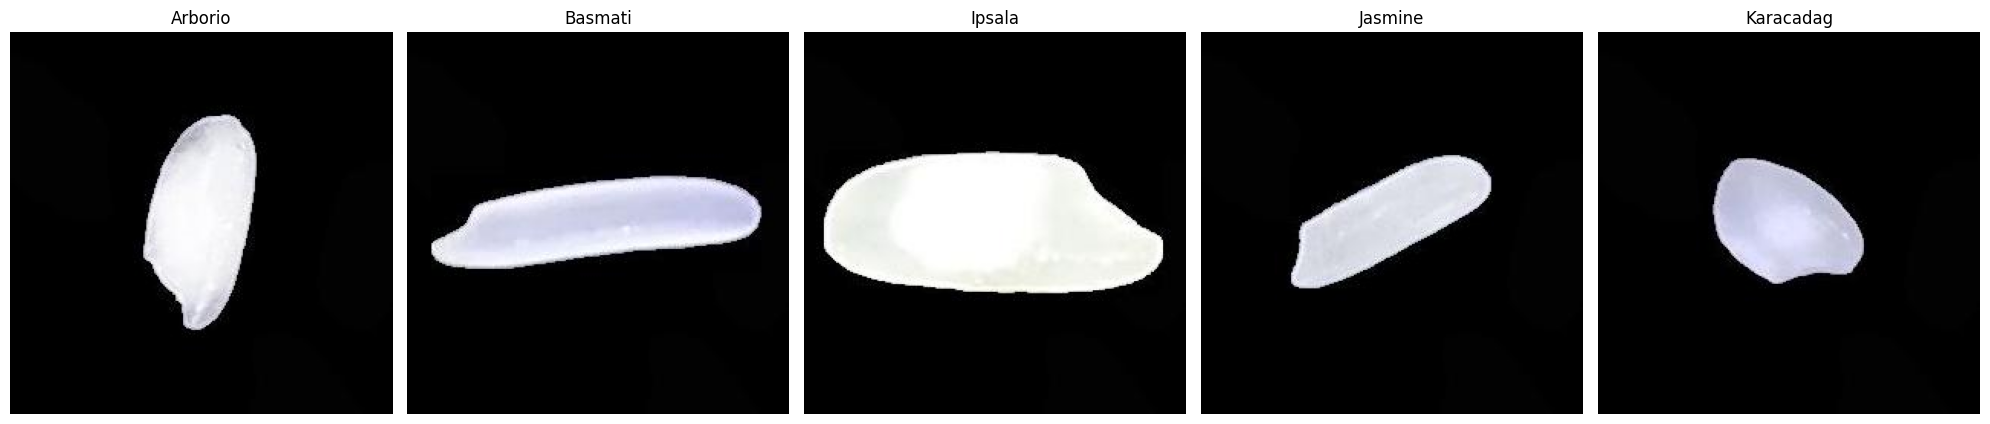

In [51]:
muestreo_categorias_inicial(label_names=label_names, images_folder=INPUT_FOLDER)

In [53]:
verificar_imagenes(all_paths=input_paths)

100%|██████████| 75000/75000 [02:35<00:00, 481.92it/s]


{}

In [6]:
def muestreo_categorias(label_names, muestra=4,save_path=None):
    N = label_names.name.nunique()
    M = muestra
    flowers_sample = tomar_muestra(label_names=label_names, muestra=M)

    fig, axs = plt.subplots(ncols=M, nrows=N, figsize=(M*4, N*4))
    for i in range(N):
        for j in range(M):
            x = flowers_sample[i, j]
            path = x['file']
            name = x['name']
            img = cv2.imread(filename=path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axs[i, j].imshow(img)
            axs[i, j].set_title(name)
            axs[i, j].axis('off')
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path)
    plt.show()
    plt.close(fig)
    return None

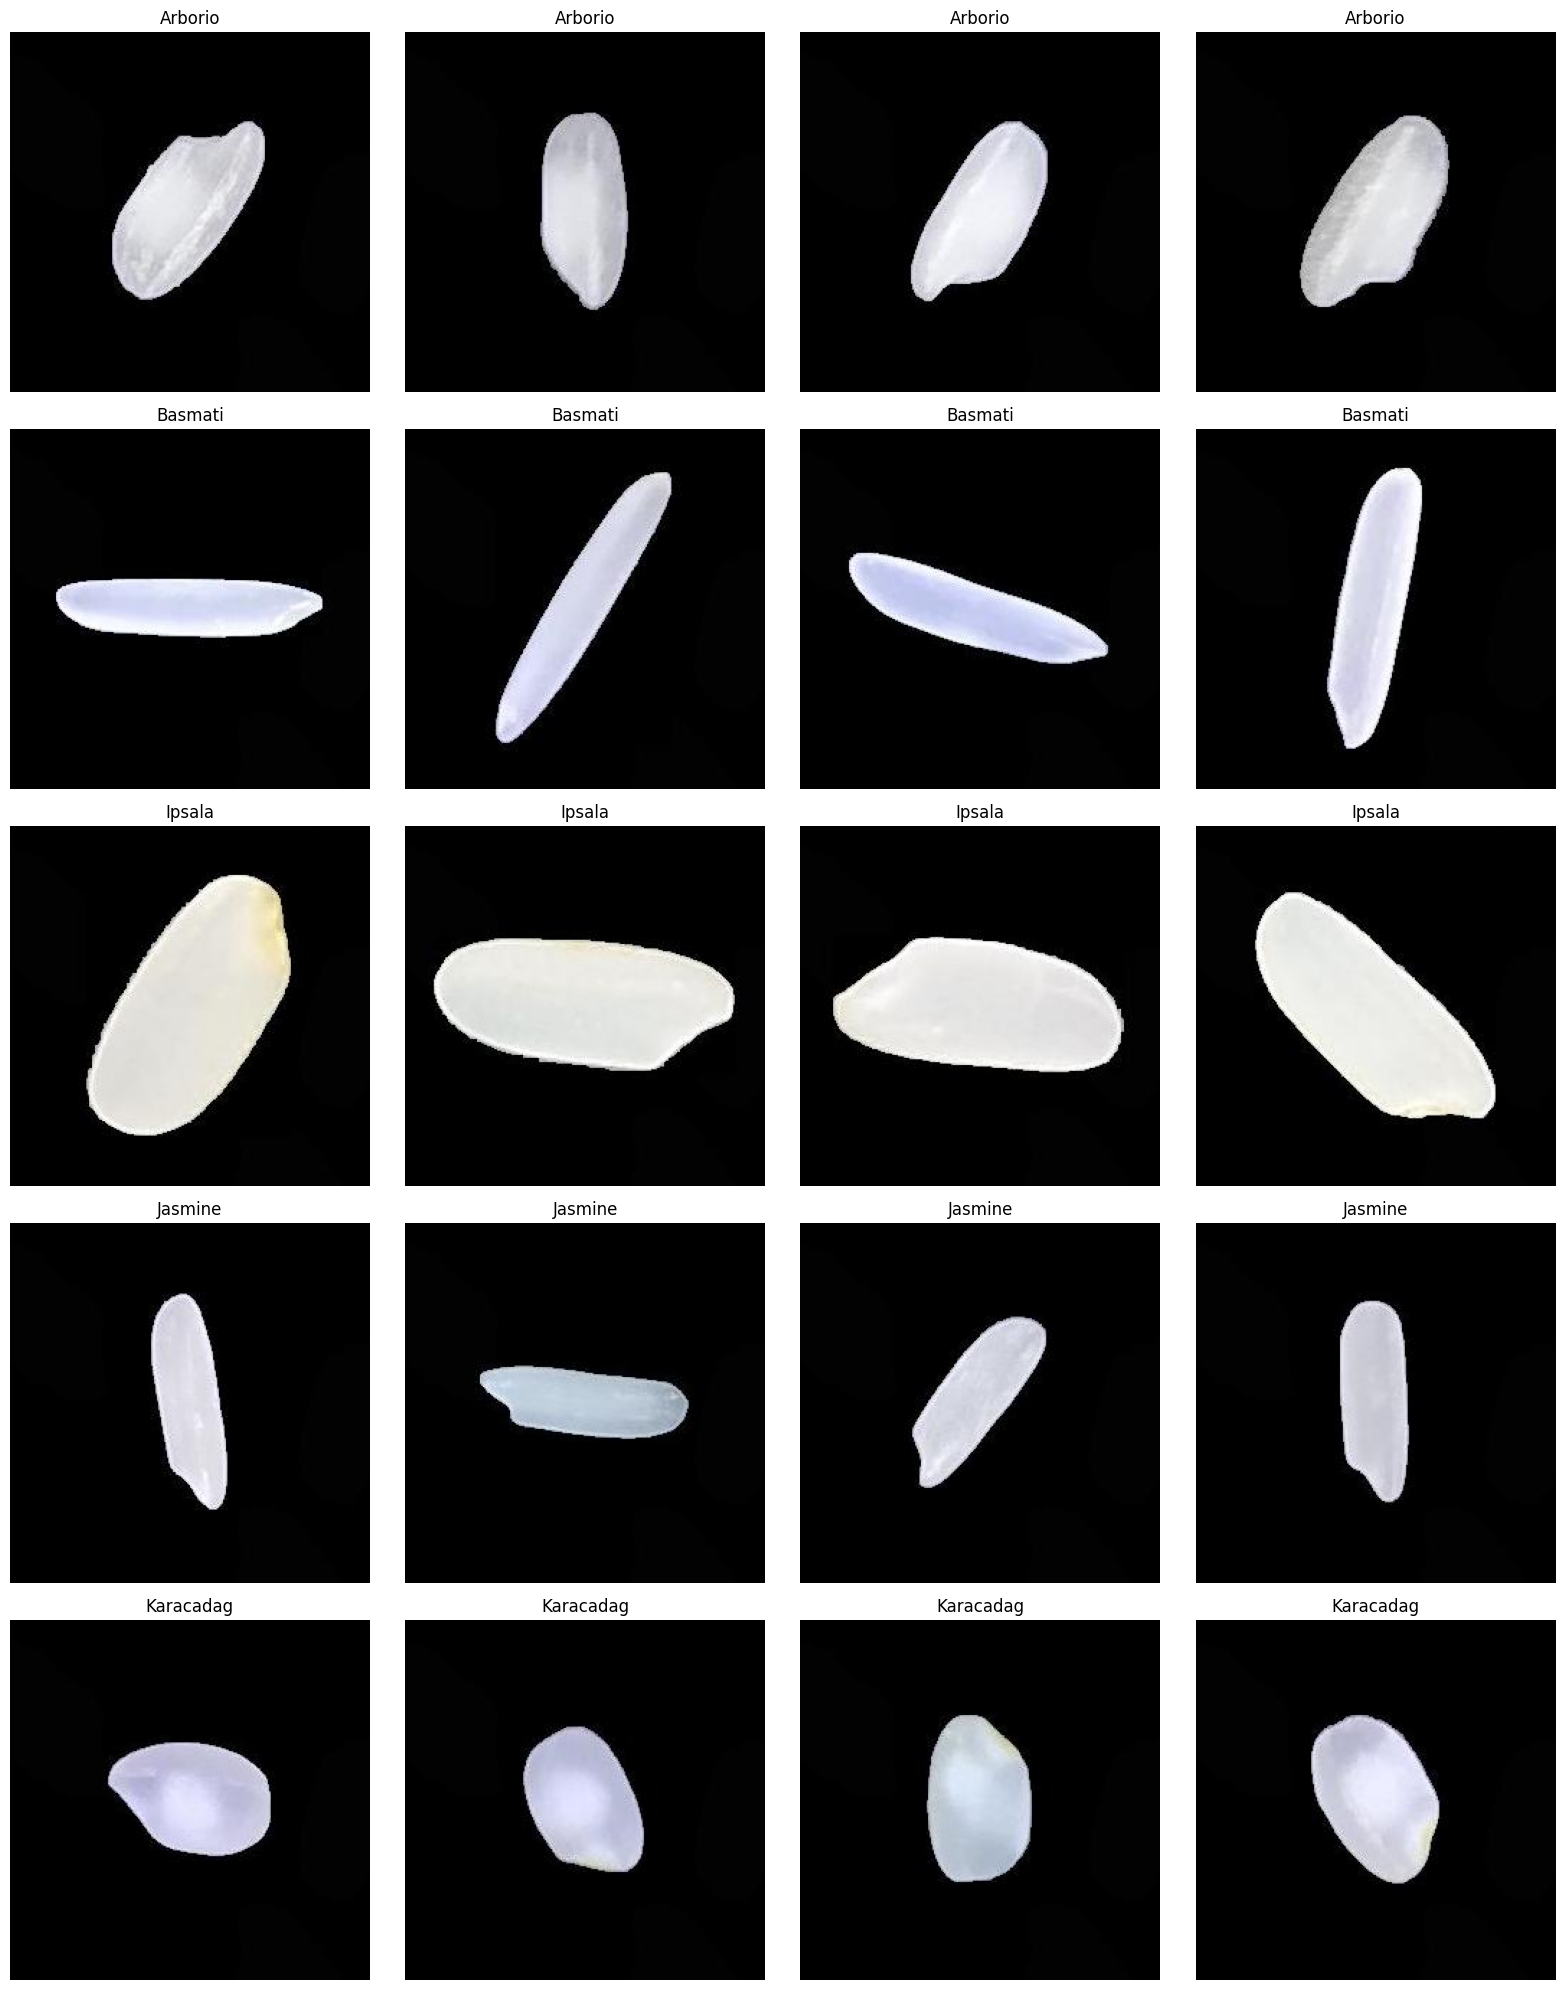

In [7]:
muestreo_categorias(label_names=label_names, muestra=4)